In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"asthashinde0","key":"c556574bdf5316bba0f3d6438c301bb8"}'}

In [ ]:
!pip install kaggle  # Install the Kaggle package
import os
# Move the uploaded kaggle.json file to the appropriate location
os.makedirs('/root/.kaggle', exist_ok=True)
!mv 'kaggle (1).json' /root/.kaggle/kaggle.json

In [ ]:
!ls -al ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 68 Mar  1 03:33 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d azizkasimov/wind-turbine-scada-data-for-early-fault-detection

Dataset URL: https://www.kaggle.com/datasets/azizkasimov/wind-turbine-scada-data-for-early-fault-detection
License(s): CC-BY-SA-4.0
100% 5.81G/5.82G [01:24<00:00, 80.0MB/s]
100% 5.82G/5.82G [01:24<00:00, 74.0MB/s]


In [ ]:
!unzip wind-turbine-scada-data-for-early-fault-detection.zip

Archive:  wind-turbine-scada-data-for-early-fault-detection.zip
  inflating: README.md               
  inflating: README.txt              
  inflating: Wind Farm A/comma_event_info.csv  
  inflating: Wind Farm A/comma_feature_description.csv  
  inflating: Wind Farm A/datasets/comma_0.csv  
  inflating: Wind Farm A/datasets/comma_10.csv  
  inflating: Wind Farm A/datasets/comma_13.csv  
  inflating: Wind Farm A/datasets/comma_14.csv  
  inflating: Wind Farm A/datasets/comma_17.csv  
  inflating: Wind Farm A/datasets/comma_22.csv  
  inflating: Wind Farm A/datasets/comma_24.csv  
  inflating: Wind Farm A/datasets/comma_25.csv  
  inflating: Wind Farm A/datasets/comma_26.csv  
  inflating: Wind Farm A/datasets/comma_3.csv  
  inflating: Wind Farm A/datasets/comma_38.csv  
  inflating: Wind Farm A/datasets/comma_40.csv  
  inflating: Wind Farm A/datasets/comma_42.csv  
  inflating: Wind Farm A/datasets/comma_45.csv  
  inflating: Wind Farm A/datasets/comma_51.csv  
  inflating: Wind Farm

In [ ]:
import os
# List all files and folders in /content
print("Files and Folders in /content:")
print(os.listdir("/content"))

Files and Folders in /content:
['.config', 'Wind Farm A', 'README.txt', 'kaggle (1).json', 'Wind Farm C', 'wind-turbine-scada-data-for-early-fault-detection.zip', 'README.md', 'Wind Farm B', 'sample_data']


In [ ]:
import os
import pandas as pd
import glob

# Define base path
base_path = "/content"

# Function to load and merge CSV files from a folder
def load_data(folder_name):
    folder_path = os.path.join(base_path, folder_name)
    all_files = glob.glob(os.path.join(folder_path, "*.csv"))
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load data from all wind farms
df_a = load_data("Wind Farm A")
df_b = load_data("Wind Farm B")
df_c = load_data("Wind Farm C")

# Combine all wind farm data
df = pd.concat([df_a, df_b, df_c], ignore_index=True)

# Display first rows
print(df.head())
print(df.info())


    sensor_name                  statistics_type              description  \
0      sensor_0                          average      Ambient temperature   
1      sensor_1                          average  Wind absolute direction   
2      sensor_2                          average  Wind relative direction   
3  wind_speed_3  maximum,minimum,average,std_dev                Windspeed   
4  wind_speed_4                          average      Estimated windspeed   

  unit is_angle is_counter  event_id event_label event_start  event_start_id  \
0   �C    False      False       NaN         NaN         NaN             NaN   
1    �     True      False       NaN         NaN         NaN             NaN   
2    �     True      False       NaN         NaN         NaN             NaN   
3  m/s    False      False       NaN         NaN         NaN             NaN   
4  m/s    False      False       NaN         NaN         NaN             NaN   

  event_end  event_end_id event_description  
0       Na

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Drop irrelevant columns (event-related columns)
df_cleaned = df.drop(columns=['event_id', 'event_label', 'event_start', 'event_start_id',
                              'event_end', 'event_end_id', 'event_description'])

# Fill missing values in categorical columns with 'Unknown'
df_cleaned.fillna({'unit': 'Unknown', 'statistics_type': 'Unknown', 'description': 'Unknown'}, inplace=True)

# Check if missing values are handled
print(df_cleaned.isnull().sum())


sensor_name        95
statistics_type     0
description         0
unit                0
is_angle           95
is_counter         95
dtype: int64


In [ ]:
df_cleaned['sensor_name'].fillna('Unknown', inplace=True)
# Convert is_angle & is_counter (True/False) to numerical (0/1), filling NaNs with 0 (assuming False)
df_cleaned['is_angle'] = df_cleaned['is_angle'].map({'True': 1, 'False': 0})
df_cleaned['is_counter'] = df_cleaned['is_counter'].map({'True': 1, 'False': 0})

<ipython-input-15-914c7b836cec>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['sensor_name'].fillna('Unknown', inplace=True)


In [ ]:
# Fill remaining NaNs in is_angle & is_counter with 0 (assuming default as False)
df_cleaned[['is_angle', 'is_counter']] = df_cleaned[['is_angle', 'is_counter']].fillna(0)

# Verify if missing values are gone
print(df_cleaned.isnull().sum())

sensor_name        0
statistics_type    0
description        0
unit               0
is_angle           0
is_counter         0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['sensor_name', 'statistics_type', 'description', 'unit']

# Apply Label Encoding
label_encoders = {}  # Store encoders for later inverse transformation
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Save the encoder

# Check encoded values
print(df_cleaned.head())


   sensor_name  statistics_type  description  unit  is_angle  is_counter
0           16                1           22    32       0.0         0.0
1           17                1          337    31       0.0         0.0
2          124                1          338    31       0.0         0.0
3          250               10          344    24       0.0         0.0
4          251                1           88    24       0.0         0.0


In [ ]:
# Select numeric columns (excluding categorical ones we encoded)
numerical_cols = ['is_angle', 'is_counter']

# Standardize numeric columns
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Verify scaling
print(df_cleaned.describe())


       sensor_name  statistics_type  description        unit  is_angle  \
count   450.000000       450.000000   450.000000  450.000000     450.0   
mean    106.417778         4.457778   205.337778   12.024444       0.0   
std      83.145316         5.406360   108.688380    9.898227       0.0   
min       0.000000         0.000000     0.000000    0.000000       0.0   
25%      16.250000         1.000000   111.250000    3.000000       0.0   
50%     110.500000         2.000000   218.500000   10.000000       0.0   
75%     181.750000         6.000000   327.000000   15.000000       0.0   
max     254.000000        23.000000   345.000000   32.000000       0.0   

       is_counter  
count       450.0  
mean          0.0  
std           0.0  
min           0.0  
25%           0.0  
50%           0.0  
75%           0.0  
max           0.0  


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Select features for training
features = ['sensor_name', 'statistics_type', 'description', 'unit']
X_train = df_cleaned[features].values

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Define Autoencoder architecture
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Save the trained model
autoencoder.save("autoencoder_model.h5")


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - loss: 0.9775 - val_loss: 0.9150
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9179 - val_loss: 0.9165
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8680 - val_loss: 0.9157
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8566 - val_loss: 0.9099
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8581 - val_loss: 0.8972
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8070 - val_loss: 0.8812
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7948 - val_loss: 0.8592
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7649 - val_loss: 0.8341
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7359 - val_loss: 0.8074
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7371 - val_loss: 0.7795
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6811 - val_loss: 0.7437
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6176 - val_

In [ ]:
# Reconstruct data using the trained model
X_train_pred = autoencoder.predict(X_train)

# Compute Mean Squared Error (MSE)
mse = np.mean(np.power(X_train - X_train_pred, 2), axis=1)

# Set threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = mse > threshold

# Add anomaly labels to dataset
df_cleaned['Anomaly'] = anomalies.astype(int)

# Check anomalies
print(df_cleaned[['sensor_name', 'Anomaly']].head(20))


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
    sensor_name  Anomaly
0            16        1
1            17        0
2           124        0
3           250        0
4           251        1
5           192        0
6           203        0
7           214        0
8           225        0
9           236        0
10           18        0
11           29        0
12           39        0
13           47        0
14           58        0
15           69        0
16           80        0
17           91        0
18          102        0
19          113        0


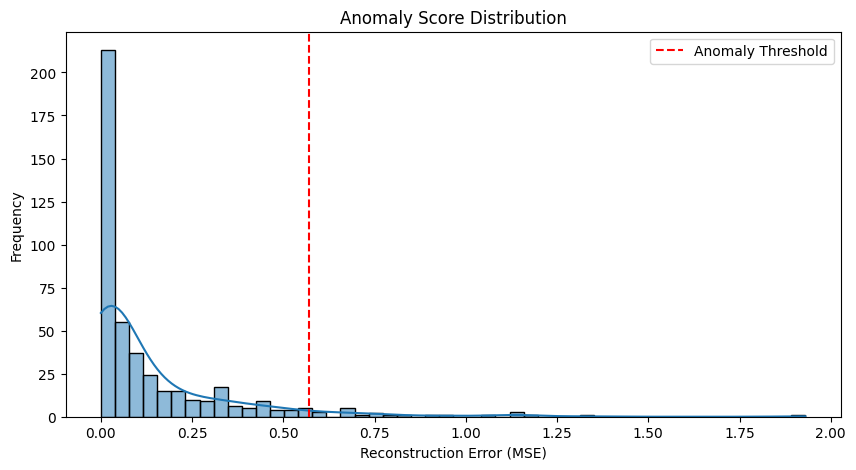

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(mse, bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.title("Anomaly Score Distribution")
plt.legend()
plt.show()

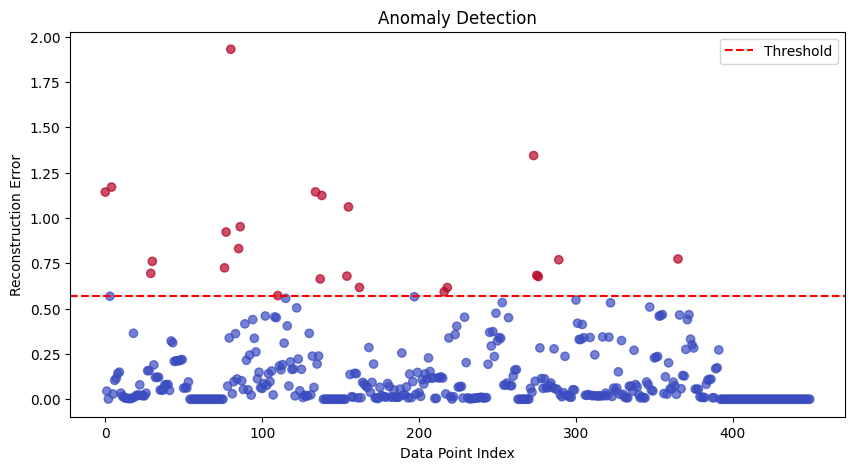

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(mse)), mse, c=anomalies, cmap='coolwarm', alpha=0.7)
plt.axhline(threshold, color='red', linestyle='dashed', label='Threshold')
plt.xlabel("Data Point Index")
plt.ylabel("Reconstruction Error")
plt.title("Anomaly Detection")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import os

# Function to process all CSV files in a folder (Wind Farm A, B, C) in smaller parts
def process_wind_farm(data_path, save_path):
    first_file = True  # To handle headers correctly
    for file in os.listdir(data_path):
        if file.endswith(".csv"):
            file_path = os.path.join(data_path, file)

            # Read CSV in small chunks (lower memory usage)
            chunk_size = 10000
            for chunk in pd.read_csv(file_path, chunksize=chunk_size, engine="python", on_bad_lines='skip',
                                     dtype={"status_type_id": "int16", "sensor_0_avg": "float32"}):  # Optimize memory
                chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')  # Convert timestamps
                chunk = chunk.sort_values(by='time_stamp')  # Sort within each chunk

                # Save processed data in smaller parts
                chunk.to_csv(save_path, mode='a', header=first_file, index=False)
                first_file = False  # Ensure headers only appear once

# Process & Save Each Wind Farm Separately
process_wind_farm("/content/Wind Farm A/datasets", "/content/processed_wind_farm_a.csv")
process_wind_farm("/content/Wind Farm B/datasets", "/content/processed_wind_farm_b.csv")
process_wind_farm("/content/Wind Farm C/datasets", "/content/processed_wind_farm_c.csv")

print("✅ Processing completed. Now merging...")

# Merge Processed Files in Small Parts
chunk_size = 10000
df_all = pd.DataFrame()

for file in ["/content/processed_wind_farm_a.csv", "/content/processed_wind_farm_b.csv", "/content/processed_wind_farm_c.csv"]:
    for chunk in pd.read_csv(file, chunksize=chunk_size, parse_dates=['time_stamp'], dtype="float32"):
        df_all = pd.concat([df_all, chunk], ignore_index=True)

# Sort & Save Final Dataset
df_all = df_all.sort_values(by='time_stamp')
df_all.to_csv("/content/final_merged_wind_farm.csv", index=False)

print("✅ Final dataset saved as: /content/final_merged_wind_farm.csv")
print(df_all.info())
